<a href="https://colab.research.google.com/github/lucasjsbarbosa/1-DESAFIO-CIENCIAS-DE-DADOS-PUC-MINAS/blob/main/Radiografia_das_Desigualdades_Raciais_no_Brasil_Um_Exame_Multidimensional_dos_Determinantes_Sociais_e_Econ%C3%B4micos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bibliotecas

In [167]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, auc
import warnings
warnings.filterwarnings('ignore')


## Extração dos Dados

In [168]:
df = pd.read_csv('MUNIC_IPMporSexoRaca_20230403.csv', delimiter=';')
df_sup =  pd.read_excel('MunicipioBrasil_20230102.xlsx')

## Análise Preliminar dos DataFrames

In [169]:
df.sample(5)

,cod_mun,sxraca,qtd_pessoas,qtd_pes_pobres,qtd_pes_vulneraveis,qtd_pes_pob_vul,qtd_0a11,qtd_0a11_pobres,qtd_0a11_vulneraveis,qtd_0a11_pob_vul,...,contr_S2,contr_S3,contr_S4,contr_T1,contr_T2,contr_T3,contr_P1,contr_P2,contr_P3,contr_P4
4941,2414605,2,"2392,83842689822","1090,68871146531","551,735715545601","1642,42442701091","517,323801083541","269,490749413088","124,232025706612","393,7227751197",...,"7,35224462891739","14,2444731253975","10,2572146455342","1,18341856645898","2,25405918369974","8,99819465997646","1,04977526410503","5,09399216232243","14,6499269000915","8,10695171250859"
16103,4107900,4,"991,137321348446","176,126876391192","217,603481577553","393,730357968744","165,656580807171","48,1622073005368","28,1015147904535","76,2637220909903",...,"2,90507353259053","15,3969668193804",",711300659287283","2,61110586450955","7,94640863309654","12,7425658833285","3,21201238217264","10,685139910969","10,7100186489489","3,38062376699791"
19911,4317608,4,"1722,84128637466","638,410034305304","483,56773041042","1121,97776471572","267,613688145119","95,9184092167245","78,4137450617329","174,332154278457",...,"8,71430841191059","11,7856897394439","3,73334135439096","1,2126689154575","1,19017521433023","12,2063489151856","12,3490420810529","7,16289888659297","10,9120892740134",",492254081265714"
18108,4214904,1,"2236,32950901795","888,562015677415","517,252408595988","1405,8144242734","289,814859717198","92,3233880050971","66,0648839323883","158,388271937485",...,"14,668795168104","15,1175696685085","6,84570343140437","9,10909547261113",",415448188206424","18,3548609519263","5,88802051645219",",917903880968334","4,41736311419067",0
18466,4300646,3,"1063,19204964892","532,054986754612","154,43395033156","686,488937086172","192,58982379284","118,511582760214","25,7371791885765","144,24876194879",...,"10,5203107562562","12,6915050646587","10,2068624788326","3,84341526683725","1,2279698198524","12,772488459829","10,5171309657637","4,20617444404878","10,8383171688077","3,23514142674196"


In [170]:
df = df.replace(',', '.', regex=True)

In [171]:
df.columns

Index(['cod_mun', 'sxraca', 'qtd_pessoas', 'qtd_pes_pobres',
       'qtd_pes_vulneraveis', 'qtd_pes_pob_vul', 'qtd_0a11', 'qtd_0a11_pobres',
       'qtd_0a11_vulneraveis', 'qtd_0a11_pob_vul', 'incidencia', 'intensidade',
       'IPM', 'qtd_pes_E1', 'qtd_pes_E2', 'qtd_pes_E3', 'qtd_pes_S1',
       'qtd_pes_S2', 'qtd_pes_S3', 'qtd_pes_S4', 'qtd_pes_T1', 'qtd_pes_T2',
       'qtd_pes_T3', 'qtd_pes_P1', 'qtd_pes_P2', 'qtd_pes_P3', 'qtd_pes_P4',
       'contr_E1', 'contr_E2', 'contr_E3', 'contr_S1', 'contr_S2', 'contr_S3',
       'contr_S4', 'contr_T1', 'contr_T2', 'contr_T3', 'contr_P1', 'contr_P2',
       'contr_P3', 'contr_P4'],
      dtype='object')

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22260 entries, 0 to 22259
Data columns (total 41 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   cod_mun               22260 non-null  int64 
 1   sxraca                22260 non-null  int64 
 2   qtd_pessoas           22260 non-null  object
 3   qtd_pes_pobres        22260 non-null  object
 4   qtd_pes_vulneraveis   22260 non-null  object
 5   qtd_pes_pob_vul       22260 non-null  object
 6   qtd_0a11              22260 non-null  object
 7   qtd_0a11_pobres       22260 non-null  object
 8   qtd_0a11_vulneraveis  22260 non-null  object
 9   qtd_0a11_pob_vul      22260 non-null  object
 10  incidencia            22260 non-null  object
 11  intensidade           22260 non-null  object
 12  IPM                   22260 non-null  object
 13  qtd_pes_E1            22260 non-null  object
 14  qtd_pes_E2            22260 non-null  object
 15  qtd_pes_E3            22260 non-null

In [173]:
df.shape

(22260, 41)

In [174]:
df = df.apply(pd.to_numeric, errors='coerce')

In [175]:
df.sample(5)

,cod_mun,sxraca,qtd_pessoas,qtd_pes_pobres,qtd_pes_vulneraveis,qtd_pes_pob_vul,qtd_0a11,qtd_0a11_pobres,qtd_0a11_vulneraveis,qtd_0a11_pob_vul,...,contr_S2,contr_S3,contr_S4,contr_T1,contr_T2,contr_T3,contr_P1,contr_P2,contr_P3,contr_P4
21064,5106455,1,408.106729,102.290375,74.754333,177.044708,72.982595,20.608859,0.000000,20.608859,...,13.106490,14.366361,13.966005,1.203650,1.369710,9.918453,6.290848,4.853514,3.943600,3.503919
11832,3161403,1,1316.367614,456.453119,179.312904,635.766024,242.765722,80.097538,42.316900,122.414438,...,14.618554,14.627827,14.107411,1.409448,1.325034,11.402691,0.120447,3.083247,14.590448,2.436437
12710,3300225,3,2906.698605,855.369868,581.643560,1437.013428,526.128701,210.393295,93.393707,303.787002,...,10.559880,12.795187,3.013916,1.216801,4.525378,12.266339,0.289866,10.968955,12.041640,3.132300
6450,2613008,3,15064.951382,8405.862719,2456.164803,10862.027522,3251.399308,2111.412632,560.419702,2671.832334,...,9.668755,9.311707,9.682601,3.274288,1.656449,13.328527,0.243734,7.053917,13.367062,5.957665
9515,3112505,4,3299.446225,615.385780,695.557736,1310.943516,501.512923,90.385831,133.888794,224.274625,...,4.063516,15.429449,2.470097,1.565203,6.372815,14.377766,0.000000,9.293646,15.544713,0.782694


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22260 entries, 0 to 22259
Data columns (total 41 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cod_mun               22260 non-null  int64  
 1   sxraca                22260 non-null  int64  
 2   qtd_pessoas           22260 non-null  float64
 3   qtd_pes_pobres        22260 non-null  float64
 4   qtd_pes_vulneraveis   22260 non-null  float64
 5   qtd_pes_pob_vul       22260 non-null  float64
 6   qtd_0a11              22260 non-null  float64
 7   qtd_0a11_pobres       22260 non-null  float64
 8   qtd_0a11_vulneraveis  22260 non-null  float64
 9   qtd_0a11_pob_vul      22260 non-null  float64
 10  incidencia            22260 non-null  float64
 11  intensidade           22243 non-null  float64
 12  IPM                   22260 non-null  float64
 13  qtd_pes_E1            22243 non-null  float64
 14  qtd_pes_E2            22243 non-null  float64
 15  qtd_pes_E3         

In [177]:
df.isnull().sum()

cod_mun                  0
sxraca                   0
qtd_pessoas              0
qtd_pes_pobres           0
qtd_pes_vulneraveis      0
qtd_pes_pob_vul          0
qtd_0a11                 0
qtd_0a11_pobres          0
qtd_0a11_vulneraveis     0
qtd_0a11_pob_vul         0
incidencia               0
intensidade             17
IPM                      0
qtd_pes_E1              17
qtd_pes_E2              17
qtd_pes_E3              17
qtd_pes_S1              17
qtd_pes_S2              17
qtd_pes_S3              17
qtd_pes_S4              17
qtd_pes_T1              17
qtd_pes_T2              17
qtd_pes_T3              17
qtd_pes_P1              17
qtd_pes_P2              17
qtd_pes_P3              17
qtd_pes_P4              17
contr_E1                17
contr_E2                17
contr_E3                17
contr_S1                17
contr_S2                17
contr_S3                17
contr_S4                17
contr_T1                17
contr_T2                17
contr_T3                17
c

In [178]:
df[df.isnull().T.any()]

,cod_mun,sxraca,qtd_pessoas,qtd_pes_pobres,qtd_pes_vulneraveis,qtd_pes_pob_vul,qtd_0a11,qtd_0a11_pobres,qtd_0a11_vulneraveis,qtd_0a11_pob_vul,...,contr_S2,contr_S3,contr_S4,contr_T1,contr_T2,contr_T3,contr_P1,contr_P2,contr_P3,contr_P4
18602,4302253,3,6.783654,0.0,4.071753,4.071753,2.711901,0.0,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18603,4302253,4,4.810614,0.0,2.671115,2.671115,0.000000,0.0,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18887,4305934,4,28.092050,0.0,15.709907,15.709907,8.595022,0.0,6.816535,6.816535,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18954,4306551,3,22.260827,0.0,6.844102,6.844102,2.732539,0.0,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19059,4307864,4,33.130943,0.0,17.290078,17.290078,4.634689,0.0,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19174,4309555,3,90.521806,0.0,13.618614,13.618614,19.724719,0.0,1.492185,1.492185,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19175,4309555,4,97.998293,0.0,3.193817,3.193817,14.567101,0.0,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19358,4311643,3,17.501230,0.0,6.420660,6.420660,2.387967,0.0,2.387967,2.387967,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19359,4311643,4,16.483851,0.0,4.032693,4.032693,4.149496,0.0,2.387967,2.387967,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19434,4312351,3,4.598000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [179]:
df_sup.sample(5)

,cod_mun,nom_mun,cod_regiao,cod_uf,qtd_dom,qtd_dom_pobres,qtd_dom_vulneraveis,qtd_dom_pob_vul,qtd_pes,qtd_pes_pobres,...,contr_T2,contr_T3,contr_P1,contr_P2,contr_P3,contr_P4,num_idhm,num_ivs,num_ibeu,num_renda
2723,3141603,Mercês,3,31,3331.0,773.193297,370.747765,1143.941062,10368.0,2891.998430,...,0.733703,14.231656,0.420524,2.355617,14.248310,2.806322,0.664,0.329,0.843,581.980928
1284,2503407,Cacimba de Areia,2,25,1033.0,497.729714,181.458914,679.188628,3557.0,1924.819788,...,1.011069,7.966633,0.100939,4.651170,14.793335,6.343708,0.596,0.438,0.821,270.264485
1541,2607109,Ingazeira,2,26,1302.0,601.092261,179.942545,781.034806,4496.0,2339.194594,...,1.756112,12.825301,0.299025,3.560531,15.001226,5.568796,0.608,0.438,0.789,353.997212
4142,4116901,Nova Esperança,4,41,8689.0,1398.357375,1367.119300,2765.476674,26615.0,5406.667795,...,2.243982,13.753619,6.850064,4.741900,14.167314,0.693225,0.722,0.291,0.841,831.313832
1617,2613503,São José do Belmonte,2,26,8825.0,3846.725085,1570.837224,5417.562309,32617.0,17346.819308,...,1.663271,11.166087,2.761163,6.003535,14.628774,6.706787,0.610,0.453,0.790,323.565386


In [180]:
df_sup.columns

Index(['cod_mun', 'nom_mun', 'cod_regiao', 'cod_uf', 'qtd_dom',
       'qtd_dom_pobres', 'qtd_dom_vulneraveis', 'qtd_dom_pob_vul', 'qtd_pes',
       'qtd_pes_pobres', 'qtd_pes_vulneraveis', 'qtd_pes_pob_vul', 'qtd_0a11',
       'qtd_0a11_pobres', 'qtd_0a11_vulneraveis', 'qtd_0a11_pob_vul',
       'incidencia', 'intensidade', 'IPM', 'IPM_quintis', 'IPM_quintis_regiao',
       'IPM_quintis_uf', 'qtd_dom_E1', 'qtd_dom_E2', 'qtd_dom_E3',
       'qtd_dom_S1', 'qtd_dom_S2', 'qtd_dom_S3', 'qtd_dom_S4', 'qtd_dom_T1',
       'qtd_dom_T2', 'qtd_dom_T3', 'qtd_dom_P1', 'qtd_dom_P2', 'qtd_dom_P3',
       'qtd_dom_P4', 'contr_E1', 'contr_E2', 'contr_E3', 'contr_S1',
       'contr_S2', 'contr_S3', 'contr_S4', 'contr_T1', 'contr_T2', 'contr_T3',
       'contr_P1', 'contr_P2', 'contr_P3', 'contr_P4', 'num_idhm', 'num_ivs',
       'num_ibeu', 'num_renda'],
      dtype='object')

In [181]:
df_sup.shape

(5565, 54)

In [182]:
df_sup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5565 entries, 0 to 5564
Data columns (total 54 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cod_mun               5565 non-null   int64  
 1   nom_mun               5565 non-null   object 
 2   cod_regiao            5565 non-null   int64  
 3   cod_uf                5565 non-null   int64  
 4   qtd_dom               5565 non-null   float64
 5   qtd_dom_pobres        5565 non-null   float64
 6   qtd_dom_vulneraveis   5565 non-null   float64
 7   qtd_dom_pob_vul       5565 non-null   float64
 8   qtd_pes               5565 non-null   float64
 9   qtd_pes_pobres        5565 non-null   float64
 10  qtd_pes_vulneraveis   5565 non-null   float64
 11  qtd_pes_pob_vul       5565 non-null   float64
 12  qtd_0a11              5565 non-null   float64
 13  qtd_0a11_pobres       5565 non-null   float64
 14  qtd_0a11_vulneraveis  5565 non-null   float64
 15  qtd_0a11_pob_vul     

## Tratando Valores Nulos

In [183]:
df.fillna(0, inplace=True)

In [184]:
df.isnull().sum()

cod_mun                 0
sxraca                  0
qtd_pessoas             0
qtd_pes_pobres          0
qtd_pes_vulneraveis     0
qtd_pes_pob_vul         0
qtd_0a11                0
qtd_0a11_pobres         0
qtd_0a11_vulneraveis    0
qtd_0a11_pob_vul        0
incidencia              0
intensidade             0
IPM                     0
qtd_pes_E1              0
qtd_pes_E2              0
qtd_pes_E3              0
qtd_pes_S1              0
qtd_pes_S2              0
qtd_pes_S3              0
qtd_pes_S4              0
qtd_pes_T1              0
qtd_pes_T2              0
qtd_pes_T3              0
qtd_pes_P1              0
qtd_pes_P2              0
qtd_pes_P3              0
qtd_pes_P4              0
contr_E1                0
contr_E2                0
contr_E3                0
contr_S1                0
contr_S2                0
contr_S3                0
contr_S4                0
contr_T1                0
contr_T2                0
contr_T3                0
contr_P1                0
contr_P2    

In [185]:
df.loc[[18602, 18603, 18887, 18954, 19059, 19174, 19175, 19358, 19359, 19434, 19435, 19442, 19443, 19527, 19979, 20226, 20227], :]

,cod_mun,sxraca,qtd_pessoas,qtd_pes_pobres,qtd_pes_vulneraveis,qtd_pes_pob_vul,qtd_0a11,qtd_0a11_pobres,qtd_0a11_vulneraveis,qtd_0a11_pob_vul,...,contr_S2,contr_S3,contr_S4,contr_T1,contr_T2,contr_T3,contr_P1,contr_P2,contr_P3,contr_P4
18602,4302253,3,6.783654,0.0,4.071753,4.071753,2.711901,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18603,4302253,4,4.810614,0.0,2.671115,2.671115,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18887,4305934,4,28.092050,0.0,15.709907,15.709907,8.595022,0.0,6.816535,6.816535,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18954,4306551,3,22.260827,0.0,6.844102,6.844102,2.732539,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19059,4307864,4,33.130943,0.0,17.290078,17.290078,4.634689,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19174,4309555,3,90.521806,0.0,13.618614,13.618614,19.724719,0.0,1.492185,1.492185,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19175,4309555,4,97.998293,0.0,3.193817,3.193817,14.567101,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19358,4311643,3,17.501230,0.0,6.420660,6.420660,2.387967,0.0,2.387967,2.387967,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19359,4311643,4,16.483851,0.0,4.032693,4.032693,4.149496,0.0,2.387967,2.387967,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19434,4312351,3,4.598000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Em consonância com a situação que prevalece nos dados das cidades de pequena escala populacional, onde a presença de valores nulos é verificada, consideraremos que a incidência desses valores ausentes é insubstancial. Portanto, procederemos à atribuição de um valor de zero a esses campos faltantes, a fim de minimizar eventuais contratempos na aplicação de técnicas de machine learning.

## Tranformação dos Dados

In [186]:
df = df.merge(df_sup[['cod_mun', 'cod_regiao', 'cod_uf']], on='cod_mun', how='inner')

In [187]:
codigo_regiao_para_nome = {
    1: 'Norte',
    2: 'Nordeste',
    3: 'Sudeste',
    4: 'Sul',
    5: 'Centro-Oeste'
}

codigo_uf_para_nome = {
    11: 'Rondônia',
    12: 'Acre',
    13: 'Amazonas',
    14: 'Roraima',
    15: 'Pará',
    16: 'Amapá',
    17: 'Tocantins',
    21: 'Maranhão',
    22: 'Piauí',
    23: 'Ceará',
    24: 'Rio Grande do Norte',
    25: 'Paraíba',
    26: 'Pernambuco',
    27: 'Alagoas',
    28: 'Sergipe',
    29: 'Bahia',
    31: 'Minas Gerais',
    32: 'Espírito Santo',
    33: 'Rio de Janeiro',
    35: 'São Paulo',
    41: 'Paraná',
    42: 'Santa Catarina',
    43: 'Rio Grande do Sul',
    50: 'Mato Grosso do Sul',
    51: 'Mato Grosso',
    52: 'Goiás',
    53: 'Distrito Federal'
}

In [188]:
df['nome_regiao'] = df['cod_regiao'].map(codigo_regiao_para_nome)
df['nome_uf'] = df['cod_uf'].map(codigo_uf_para_nome)

In [189]:
df_sup['nome_regiao'] = df_sup['cod_regiao'].map(codigo_regiao_para_nome)
df_sup['nome_uf'] = df_sup['cod_uf'].map(codigo_uf_para_nome)

In [190]:
codigo_sxraca_para_raca = {
    1: 'Branca',
    2: 'Branca',
    3: 'Negra ou Parda',
    4: 'Negra ou Parda'
}

codigo_sxraca_para_sexo = {
    1: 'Masculino',
    2: 'Feminino',
    3: 'Masculino',
    4: 'Feminino'
}

df['raca'] = df['sxraca'].map(codigo_sxraca_para_raca)
df['sexo'] = df['sxraca'].map(codigo_sxraca_para_sexo)

In [191]:
df.head()

,cod_mun,sxraca,qtd_pessoas,qtd_pes_pobres,qtd_pes_vulneraveis,qtd_pes_pob_vul,qtd_0a11,qtd_0a11_pobres,qtd_0a11_vulneraveis,qtd_0a11_pob_vul,...,contr_P1,contr_P2,contr_P3,contr_P4,cod_regiao,cod_uf,nome_regiao,nome_uf,raca,sexo
0,1100015,1,5399.820941,3744.708887,971.790297,4716.499184,1107.500897,749.022378,270.117243,1019.139620,...,11.925765,2.947832,12.117023,3.603032,1,11,Norte,Rondônia,Branca,Masculino
1,1100015,2,5183.503167,3434.517663,1020.240749,4454.758412,982.261735,661.210929,200.944593,862.155522,...,12.268219,2.620513,12.714196,3.475430,1,11,Norte,Rondônia,Branca,Feminino
2,1100015,3,6917.646546,5163.851188,855.435766,6019.286954,1261.861919,1047.049346,129.612349,1176.661694,...,11.607150,4.903645,13.040600,3.492751,1,11,Norte,Rondônia,Negra ou Parda,Masculino
3,1100015,4,6298.604725,4522.852378,1041.304147,5564.156526,1450.124604,1113.328260,185.400602,1298.728862,...,11.641533,4.899768,13.341350,3.583131,1,11,Norte,Rondônia,Negra ou Parda,Feminino
4,1100023,1,16072.748219,6733.824654,3369.778042,10103.602695,3528.300235,1475.145063,808.247197,2283.392259,...,9.983389,5.876910,12.136693,1.890679,1,11,Norte,Rondônia,Branca,Masculino


In [192]:
df_sup.head()

,cod_mun,nom_mun,cod_regiao,cod_uf,qtd_dom,qtd_dom_pobres,qtd_dom_vulneraveis,qtd_dom_pob_vul,qtd_pes,qtd_pes_pobres,...,contr_P1,contr_P2,contr_P3,contr_P4,num_idhm,num_ivs,num_ibeu,num_renda,nome_regiao,nome_uf
0,1100015,Alta Floresta D'Oeste,1,11,7443.0,4815.110866,1378.041441,6193.152307,24392.0,17426.222018,...,12.250263,3.101195,13.260453,3.487523,0.641,0.376,0.625,548.809498,Norte,Rondônia
1,1100023,Ariquemes,1,11,27654.0,11601.470928,6327.880993,17929.351921,90353.0,44172.856817,...,10.907053,4.653805,12.506057,2.015588,0.702,0.268,0.709,762.672776,Norte,Rondônia
2,1100031,Cabixi,1,11,1979.0,1280.951291,468.406271,1749.357562,6313.0,4459.568118,...,11.696466,2.517816,14.098967,2.134615,0.650,0.300,0.665,523.394761,Norte,Rondônia
3,1100049,Cacoal,1,11,24413.0,6993.735293,3929.625264,10923.360558,78574.0,26757.319951,...,10.875981,3.901138,11.589410,3.029373,0.718,0.255,0.776,825.929402,Norte,Rondônia
4,1100056,Cerejeiras,1,11,5399.0,2982.974817,1054.726046,4037.700863,17029.0,10345.154932,...,13.383966,2.437176,13.601732,2.080656,0.692,0.280,0.674,629.383679,Norte,Rondônia


## Análise Exploratória dos Dados (EDA)

In [193]:
df.describe()

,cod_mun,sxraca,qtd_pessoas,qtd_pes_pobres,qtd_pes_vulneraveis,qtd_pes_pob_vul,qtd_0a11,qtd_0a11_pobres,qtd_0a11_vulneraveis,qtd_0a11_pob_vul,...,contr_S4,contr_T1,contr_T2,contr_T3,contr_P1,contr_P2,contr_P3,contr_P4,cod_regiao,cod_uf
count,2.226000e+04,22260.000000,2.226000e+04,22260.000000,22260.000000,22260.000000,22260.000000,22260.000000,22260.000000,22260.000000,...,22260.000000,22260.000000,22260.000000,22260.000000,22260.000000,22260.000000,22260.000000,22260.000000,22260.000000,22260.000000
mean,3.253053e+06,2.500000,8.436338e+03,1973.943166,1117.106783,3091.049949,1575.109716,491.519397,231.960359,723.479756,...,8.246674,2.146748,2.804033,12.259543,3.994138,6.608248,13.291624,3.793738,2.897215,32.372327
std,9.844551e+05,1.118059,5.183956e+04,5201.137690,4687.517865,9559.360507,8487.023682,1359.696124,1043.924721,2305.878226,...,3.717191,1.551926,2.127875,3.014962,4.368118,2.805729,1.946926,2.521334,1.087667,9.829295
min,1.100015e+06,1.000000,4.598000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000
25%,2.512101e+06,1.750000,1.079020e+03,334.973056,186.490332,555.725217,203.468189,66.639921,33.546407,109.444880,...,5.645326,1.146947,1.305566,10.305658,0.323822,4.613822,12.597463,1.673941,2.000000,25.000000
50%,3.146206e+06,2.500000,2.369705e+03,809.476595,405.083965,1263.090612,465.830000,176.605704,77.446118,267.363619,...,8.742579,1.866614,2.333876,12.417980,1.844688,6.597645,13.781843,3.442872,3.000000,31.000000
75%,4.119004e+06,3.250000,5.700293e+03,1924.273933,907.839181,2917.787801,1144.920063,461.235935,179.673742,657.751608,...,11.154320,2.804811,3.778872,14.275983,7.665470,8.402176,14.471382,5.774338,4.000000,41.000000
max,5.300108e+06,4.000000,3.653488e+06,180924.496189,227564.505933,377513.519112,538355.280777,51697.164622,53465.154187,91961.642784,...,17.727411,21.051301,23.524428,24.393933,18.751875,17.650381,18.751875,13.376066,5.000000,53.000000


Text(0.5, 1.0, 'Histograma do Índice de Pobreza Multidimensional (IPM)')

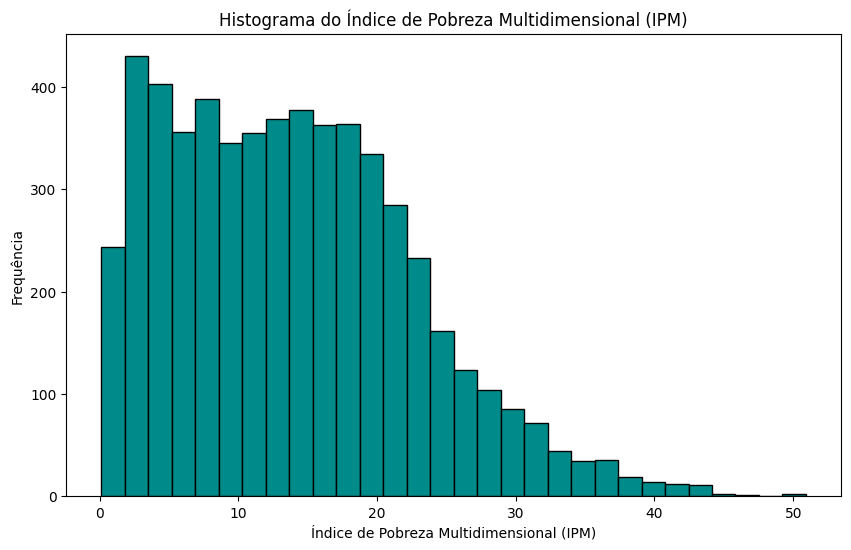

In [194]:
plt.figure(figsize=(10, 6))
plt.hist(df_sup['IPM'], bins=30, color='darkcyan', edgecolor='black')
plt.xlabel('Índice de Pobreza Multidimensional (IPM)')
plt.ylabel('Frequência')
plt.title('Histograma do Índice de Pobreza Multidimensional (IPM)')

Tendo em vista o histograma do IPM no Brasil, vamos agora investigar qual a grupo de pessoas mais afetado pela pobreza segundo o índice de pobreza multidimensional

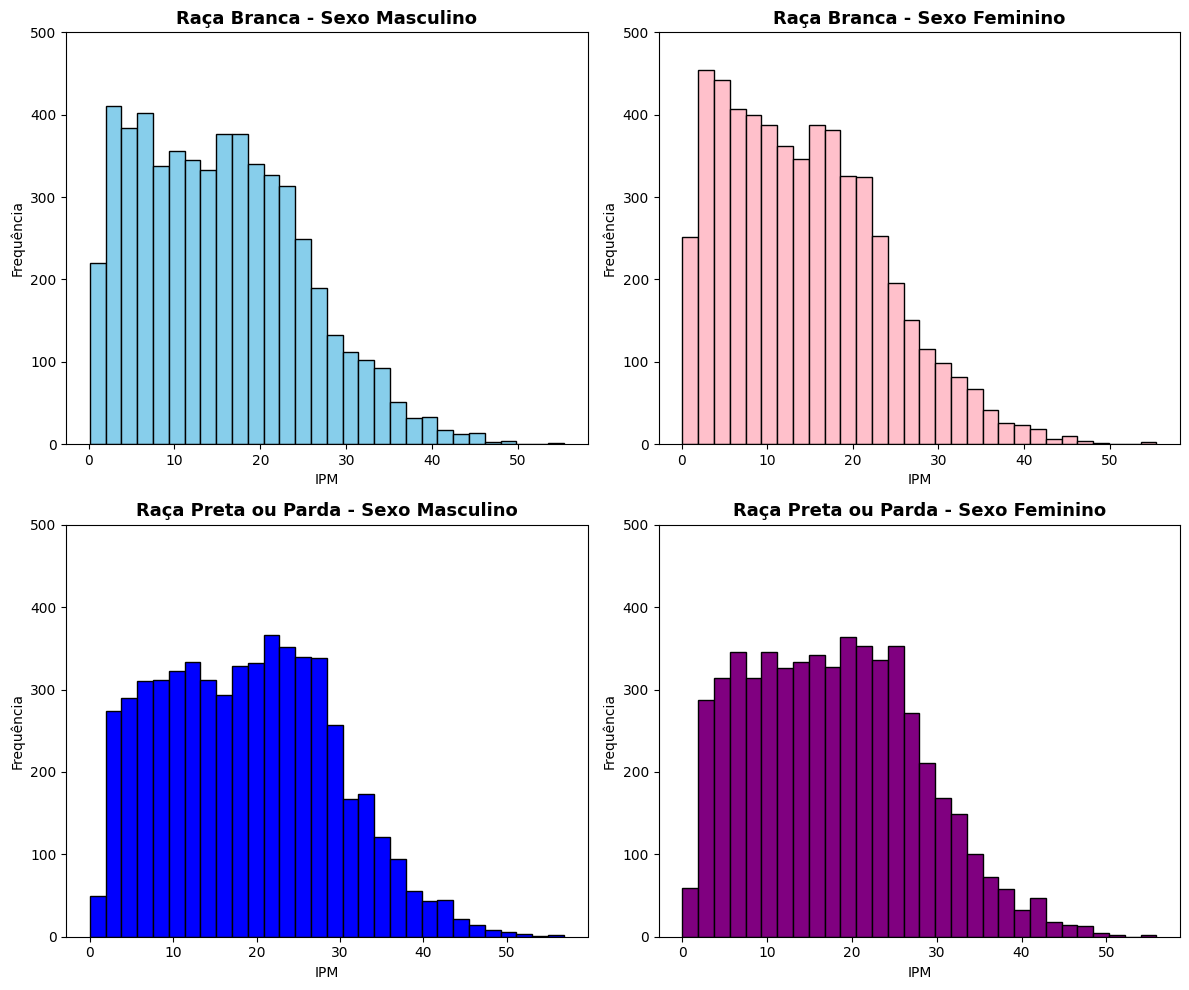

In [195]:
df_branco_masculino = df[(df['raca'] == 'Branca') & (df['sexo'] == 'Masculino')]
df_branco_feminino = df[(df['raca'] == 'Branca') & (df['sexo'] == 'Feminino')]
df_parda_masculino = df[(df['raca'] == 'Negra ou Parda') & (df['sexo'] == 'Masculino')]
df_parda_feminino = df[(df['raca'] == 'Negra ou Parda') & (df['sexo'] == 'Feminino')]

plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.hist(df_branco_masculino['IPM'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('IPM')
plt.ylabel('Frequência')
plt.title('Raça Branca - Sexo Masculino', fontsize=13, fontweight='bold')
plt.ylim(0, 500)

plt.subplot(2, 2, 2)
plt.hist(df_branco_feminino['IPM'], bins=30, color='pink', edgecolor='black')
plt.xlabel('IPM')
plt.ylabel('Frequência')
plt.title('Raça Branca - Sexo Feminino', fontsize=13, fontweight='bold')
plt.ylim(0, 500)

plt.subplot(2, 2, 3)
plt.hist(df_parda_masculino['IPM'], bins=30, color='blue', edgecolor='black')
plt.xlabel('IPM')
plt.ylabel('Frequência')
plt.title('Raça Preta ou Parda - Sexo Masculino', fontsize=13, fontweight='bold')
plt.ylim(0, 500)

plt.subplot(2, 2, 4)
plt.hist(df_parda_feminino['IPM'], bins=30, color='purple', edgecolor='black')
plt.xlabel('IPM')
plt.ylabel('Frequência')
plt.title('Raça Preta ou Parda - Sexo Feminino', fontsize=13, fontweight='bold')
plt.ylim(0, 500)

plt.tight_layout()
plt.show()


In [196]:
estatisticas_branco_masculino = np.array(df_branco_masculino['IPM'])
estatisticas_branco_feminino = np.array(df_branco_feminino['IPM'])
estatisticas_parda_masculino = np.array(df_parda_masculino['IPM'])
estatisticas_parda_feminino = np.array(df_parda_feminino['IPM'])

media = [np.mean( grupo) for grupo in [estatisticas_branco_masculino, estatisticas_branco_feminino, estatisticas_parda_masculino, estatisticas_parda_feminino]]
mediana = [np.median( grupo) for grupo in [estatisticas_branco_masculino, estatisticas_branco_feminino, estatisticas_parda_masculino, estatisticas_parda_feminino]]
desvio_padrao = [np.std( grupo) for grupo in [estatisticas_branco_masculino, estatisticas_branco_feminino, estatisticas_parda_masculino, estatisticas_parda_feminino]]
minimo = [np.min( grupo) for grupo in [estatisticas_branco_masculino, estatisticas_branco_feminino, estatisticas_parda_masculino, estatisticas_parda_feminino]]
maximo = [np.max( grupo) for grupo in [estatisticas_branco_masculino, estatisticas_branco_feminino, estatisticas_parda_masculino, estatisticas_parda_feminino]]
q1 = [np.percentile( grupo, 25) for grupo in [estatisticas_branco_masculino, estatisticas_branco_feminino, estatisticas_parda_masculino, estatisticas_parda_feminino]]
q3 = [np.percentile( grupo, 75) for grupo in [estatisticas_branco_masculino, estatisticas_branco_feminino, estatisticas_parda_masculino, estatisticas_parda_feminino]]
iqr = [q3[i] - q1[i] for i in range(len(q1))]

for i, grupo in enumerate(["Branca Masculino", "Branca Feminino", "Preta ou Parda Masculino", "Preta ou Parda Feminino"]):
    print(f"Estatísticas para o grupo {grupo}:")
    print(f"Média: {media[i]:.2f}")
    print(f"Mediana: {mediana[i]:.2f}")
    print(f"Desvio Padrão: {desvio_padrao[i]:.2f}")
    print(f"Mínimo: {minimo[i]:.2f}")
    print(f"Máximo: {maximo[i]:.2f}")
    print(f"Primeiro Quartil (Q1): {q1[i]:.2f}")
    print(f"Terceiro Quartil (Q3): {q3[i]:.2f}")
    print(f"Intervalo Interquartil (IQR): {iqr[i]:.2f}")
    print()


Estatísticas para o grupo Branca Masculino:
Média: 15.49
Mediana: 14.84
Desvio Padrão: 9.56
Mínimo: 0.14
Máximo: 55.34
Primeiro Quartil (Q1): 7.41
Terceiro Quartil (Q3): 22.04
Intervalo Interquartil (IQR): 14.64

Estatísticas para o grupo Branca Feminino:
Média: 14.40
Mediana: 13.37
Desvio Padrão: 9.26
Mínimo: 0.07
Máximo: 55.45
Primeiro Quartil (Q1): 6.63
Terceiro Quartil (Q3): 20.53
Intervalo Interquartil (IQR): 13.90

Estatísticas para o grupo Preta ou Parda Masculino:
Média: 18.89
Mediana: 18.71
Desvio Padrão: 10.27
Mínimo: 0.00
Máximo: 56.87
Primeiro Quartil (Q1): 10.52
Terceiro Quartil (Q3): 26.28
Intervalo Interquartil (IQR): 15.75

Estatísticas para o grupo Preta ou Parda Feminino:
Média: 17.88
Mediana: 17.46
Desvio Padrão: 9.96
Mínimo: 0.00
Máximo: 55.89
Primeiro Quartil (Q1): 9.71
Terceiro Quartil (Q3): 24.83
Intervalo Interquartil (IQR): 15.11



Comparando os grupos Branca Masculino, Branca Feminino, Preta ou Parda Masculino e Preta ou Parda Feminino em relação ao Índice de Pobreza Multidimensional (IPM), observamos algumas distinções. O grupo Preta ou Parda Masculino tem a média mais alta, indicando que, em média, possui um IPM mais elevado. Por outro lado, o grupo Branca Feminino tem a média mais baixa, sugerindo um IPM mais baixo em média. A mediana segue um padrão semelhante, com o grupo Preta ou Parda Masculino tendo a mediana mais alta e o grupo Branca Feminino com a mediana mais baixa. O desvio padrão revela que o grupo Preta ou Parda Masculino tem maior variabilidade nos valores do IPM, indicando uma dispersão mais ampla dos dados. Os quartis destacam que o grupo Preta ou Parda Masculino possui valores mais altos em ambos Q1 (primeiro quartil) e Q3 (terceiro quartil). Em resumo, o grupo Preta ou Parda Masculino demonstra uma tendência a ter um IPM mais alto, com maior variação, enquanto o grupo Branca Feminino apresenta um IPM mais baixo em média e menor variabilidade.

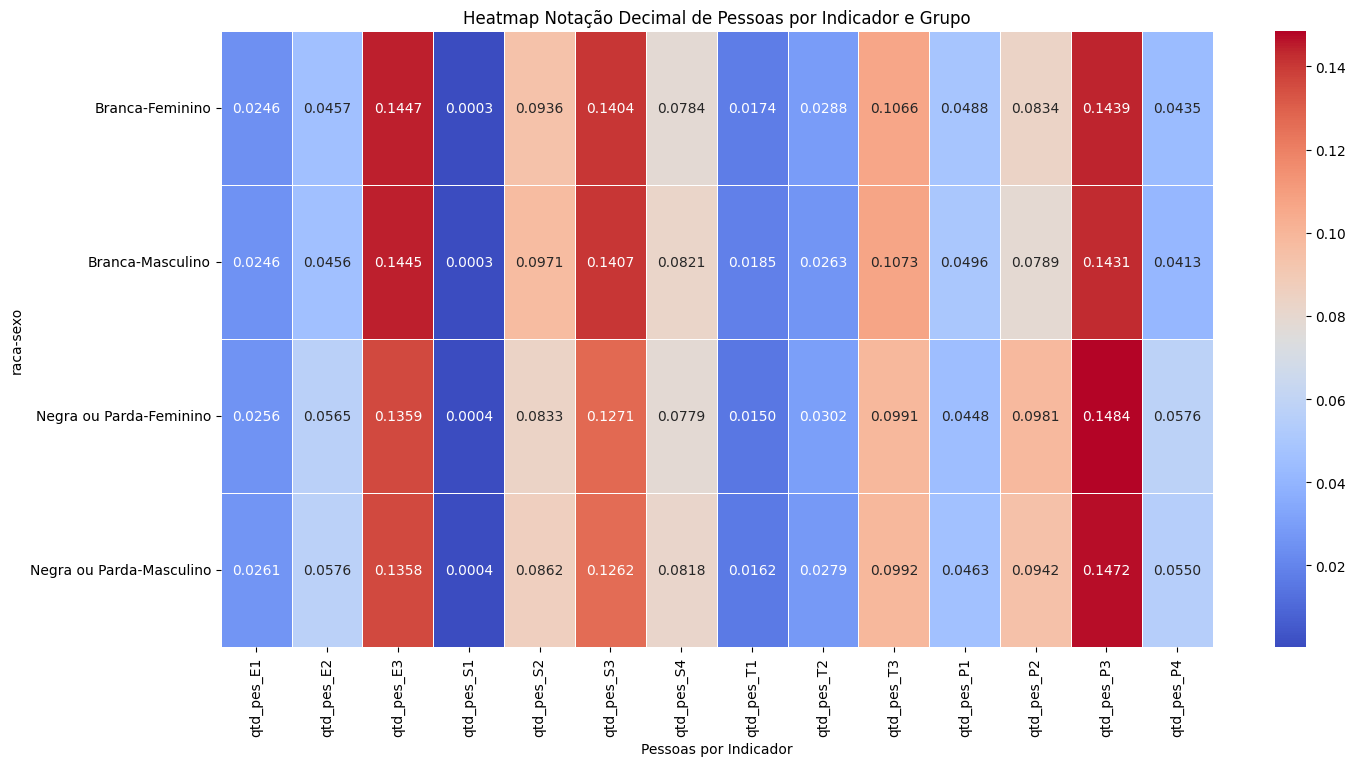

In [197]:

variaveis_heatmap = [
    'qtd_pes_E1', 'qtd_pes_E2', 'qtd_pes_E3', 'qtd_pes_S1', 'qtd_pes_S2', 'qtd_pes_S3',
    'qtd_pes_S4', 'qtd_pes_T1', 'qtd_pes_T2', 'qtd_pes_T3', 'qtd_pes_P1', 'qtd_pes_P2',
    'qtd_pes_P3', 'qtd_pes_P4'
]

df_heatmap = df[['raca', 'sexo'] + variaveis_heatmap]

heatmap_data = df_heatmap.groupby(['raca', 'sexo'])[variaveis_heatmap].sum()
total_pessoas_por_grupo = heatmap_data.sum(axis=1)
heatmap_data_percent = heatmap_data.div(total_pessoas_por_grupo, axis=0)

plt.figure(figsize=(16, 8))
sns.heatmap(heatmap_data_percent, annot=True, cmap='coolwarm', fmt='.4f', linewidths=.5)  # Usando fmt='.1f' para mostrar uma casa decimal
plt.title('Heatmap Notação Decimal de Pessoas por Indicador e Grupo')
plt.xlabel('Pessoas por Indicador')
plt.show()



In [198]:
variaveis_descricao = [
    'qtd_pes_E1', 'qtd_pes_E2', 'qtd_pes_E3', 'qtd_pes_S1', 'qtd_pes_S2', 'qtd_pes_S3',
    'qtd_pes_S4', 'qtd_pes_T1', 'qtd_pes_T2', 'qtd_pes_T3', 'qtd_pes_P1', 'qtd_pes_P2',
    'qtd_pes_P3', 'qtd_pes_P4'
]

df_descricao = df[['raca', 'sexo'] + variaveis_descricao]

descricao_por_grupo = df_descricao.groupby(['raca', 'sexo'])[variaveis_descricao].sum()

total_pessoas_por_grupo = descricao_por_grupo.sum(axis=1)
descricao_por_grupo_percent = (descricao_por_grupo.T / total_pessoas_por_grupo).T

print(descricao_por_grupo_percent)


                          qtd_pes_E1  qtd_pes_E2  qtd_pes_E3  qtd_pes_S1  \
raca           sexo                                                        
Branca         Feminino     0.024566    0.045657    0.144675    0.000322   
               Masculino    0.024637    0.045640    0.144479    0.000289   
Negra ou Parda Feminino     0.025621    0.056533    0.135868    0.000414   
               Masculino    0.026114    0.057554    0.135756    0.000366   

                          qtd_pes_S2  qtd_pes_S3  qtd_pes_S4  qtd_pes_T1  \
raca           sexo                                                        
Branca         Feminino     0.093607    0.140431    0.078364    0.017413   
               Masculino    0.097069    0.140690    0.082090    0.018543   
Negra ou Parda Feminino     0.083250    0.127149    0.077945    0.014963   
               Masculino    0.086213    0.126213    0.081800    0.016155   

                          qtd_pes_T2  qtd_pes_T3  qtd_pes_P1  qtd_pes_P2  \
raca      

In [199]:
regiao_ipm = df.groupby('nome_regiao')['IPM'].mean().sort_values(ascending=False)

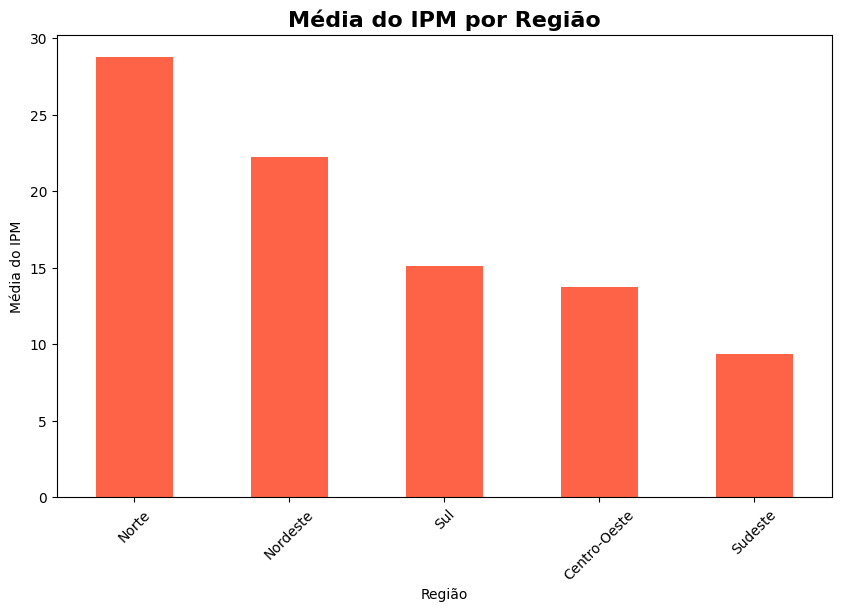

In [200]:
plt.figure(figsize=(10, 6))
regiao_ipm.plot(kind='bar', color='tomato')
plt.title('Média do IPM por Região', fontsize=16, fontweight='bold')
plt.xlabel('Região')
plt.ylabel('Média do IPM')
plt.xticks(rotation=45)
plt.show()

<Figure size 1500x800 with 0 Axes>

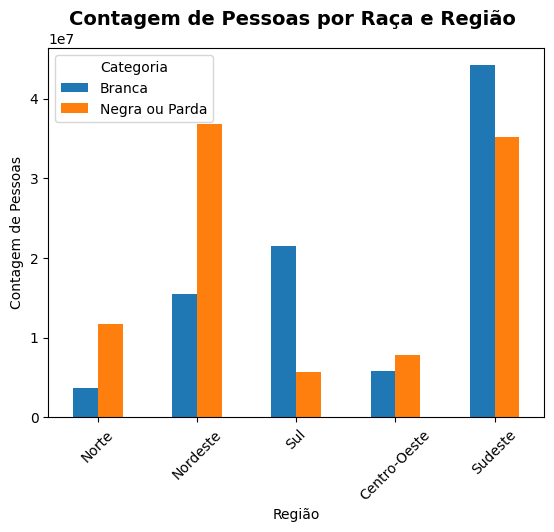

In [201]:
codigo_sxraca_para_categoria = {
    1: 'Branca',
    2: 'Branca',
    3: 'Negra ou Parda',
    4: 'Negra ou Parda'
}

df['categoria'] = df['sxraca'].map(codigo_sxraca_para_categoria)
contagem_por_categoria_regiao = df.groupby(['nome_regiao', 'categoria'])['qtd_pessoas'].sum()
contagem_por_categoria_regiao = contagem_por_categoria_regiao.unstack()
ordem_regioes = ['Norte', 'Nordeste', 'Sul', 'Centro-Oeste', 'Sudeste']
contagem_por_categoria_regiao = contagem_por_categoria_regiao.reindex(ordem_regioes)


plt.figure(figsize=(15, 8))
contagem_por_categoria_regiao.plot(kind='bar')
plt.title('Contagem de Pessoas por Raça e Região ', y=1.04, fontsize=14, fontweight='bold')
plt.xlabel('Região')
plt.ylabel('Contagem de Pessoas')
plt.xticks(rotation=45)
plt.legend(title='Categoria')
plt.show()


O gráfico de barras que representa a média do Índice de Progresso Social (IPM) por região do Brasil revela importantes disparidades regionais. Notavelmente, as regiões do Norte, Nordeste, Sul, Centro-Oeste e Sudeste, nessa ordem, exibem valores médios do IPM significativamente superiores. Essa tendência sugere diferenças consideráveis no desenvolvimento social entre as diferentes áreas do país.

Um aspecto interessante a se destacar é que, no Norte e no Nordeste, as duas regiões com as médias mais elevadas de IPM, também se concentram as maiores proporções de pessoas de raça negra ou parda. Esse fato sublinha a importância de considerar a interseção entre raça e desenvolvimento social, destacando como a equidade racial é uma questão fundamental para a melhoria das condições de vida nessas regiões.

Essas descobertas enfatizam a necessidade de políticas públicas que visem a redução das desigualdades regionais e raciais, promovendo um desenvolvimento mais inclusivo e equitativo em todo o país. O entendimento dessas tendências no IPM por região é crucial para orientar esforços no sentido de garantir uma sociedade mais justa e igualitária para todos os brasileiros.

## Machine Learning

### Normalização dos Dados

In [202]:
df['racaML'] = df['raca'].apply(lambda x: 0 if x == 'Branca' else 1)

In [203]:
dfML= df.merge(df_sup[['cod_mun', 'num_ibeu', 'num_renda', 'num_ivs', 'num_idhm']], on='cod_mun', how='inner')


In [204]:
dfML = dfML[['incidencia', 'qtd_pes_E1', 'qtd_pes_E2', 'qtd_pes_E3', 'qtd_pes_S1', 'qtd_pes_S2', 'qtd_pes_S3',
    'qtd_pes_S4', 'qtd_pes_T1', 'qtd_pes_T2', 'qtd_pes_T3', 'qtd_pes_P1', 'qtd_pes_P2',
    'qtd_pes_P3', 'qtd_pes_P4','intensidade', 'IPM', 'num_idhm', 'num_ivs', 'num_ibeu', 'num_renda','racaML']]
dfML = dfML.replace([' ','-'],'_', regex=True)

In [205]:
colunas_para_normalizar = ['incidencia', 'qtd_pes_E1', 'qtd_pes_E2', 'qtd_pes_E3', 'qtd_pes_S1', 'qtd_pes_S2', 'qtd_pes_S3', 'qtd_pes_S4', 'qtd_pes_T1', 'qtd_pes_T2', 'qtd_pes_T3', 'qtd_pes_P1', 'qtd_pes_P2', 'qtd_pes_P3', 'qtd_pes_P4', 'intensidade', 'IPM', 'num_idhm', 'num_ivs', 'num_ibeu', 'num_renda','racaML']
scaler = MinMaxScaler()
dfML[colunas_para_normalizar] = scaler.fit_transform(dfML[colunas_para_normalizar])

In [206]:
dfML.head(6)

,incidencia,qtd_pes_E1,qtd_pes_E2,qtd_pes_E3,qtd_pes_S1,qtd_pes_S2,qtd_pes_S3,qtd_pes_S4,qtd_pes_T1,qtd_pes_T2,...,qtd_pes_P2,qtd_pes_P3,qtd_pes_P4,intensidade,IPM,num_idhm,num_ivs,num_ibeu,num_renda,racaML
0,0.703661,0.010578,0.008294,0.023808,0.000000,0.040654,0.024965,0.074037,0.014444,0.005743,...,0.005072,0.023878,0.020494,0.737477,0.540343,0.502252,0.412104,0.357002,0.196814,0.0
1,0.672306,0.007505,0.005865,0.021062,0.000000,0.038501,0.022767,0.059105,0.010227,0.004112,...,0.004012,0.022296,0.017591,0.715544,0.500911,0.502252,0.412104,0.357002,0.196814,0.0
2,0.757426,0.013947,0.012053,0.032175,0.006244,0.055129,0.033226,0.087052,0.018036,0.007744,...,0.011677,0.035567,0.027496,0.740196,0.583773,0.502252,0.412104,0.357002,0.196814,1.0
3,0.728606,0.010209,0.008625,0.026821,0.024977,0.048421,0.029669,0.071337,0.016074,0.006723,...,0.009997,0.031177,0.024168,0.724077,0.549332,0.502252,0.412104,0.357002,0.196814,1.0
4,0.425105,0.017709,0.018369,0.037748,0.036132,0.072352,0.045385,0.063374,0.029505,0.012176,...,0.017437,0.041246,0.018546,0.707266,0.313066,0.639640,0.256484,0.522682,0.294796,0.0
5,0.383587,0.014336,0.015641,0.034312,0.025513,0.063816,0.041064,0.055897,0.024303,0.011306,...,0.016074,0.036244,0.019245,0.706652,0.282245,0.639640,0.256484,0.522682,0.294796,0.0


### Dados de Treinamento e Teste

In [207]:
y = dfML.racaML

In [208]:
X = dfML.drop(['racaML'], axis=1)

In [209]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [210]:
X_new = X.loc[[6785,7586,2195]]

In [211]:
all_col_with_plus = ' + '.join(dfML.drop(['racaML'], axis=1).columns)
modelo = smf.glm(formula='racaML ~ ' + all_col_with_plus, data=dfML,
                family = sm.families.Binomial()).fit()
print(modelo.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 racaML   No. Observations:                22260
Model:                            GLM   Df Residuals:                    22238
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11759.
Date:                Wed, 25 Oct 2023   Deviance:                       23518.
Time:                        14:49:46   Pearson chi2:                 6.52e+11
No. Iterations:                     8   Pseudo R-squ. (CS):             0.2809
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -11.5813      0.689    -16.803      

### Árvore de Decisão

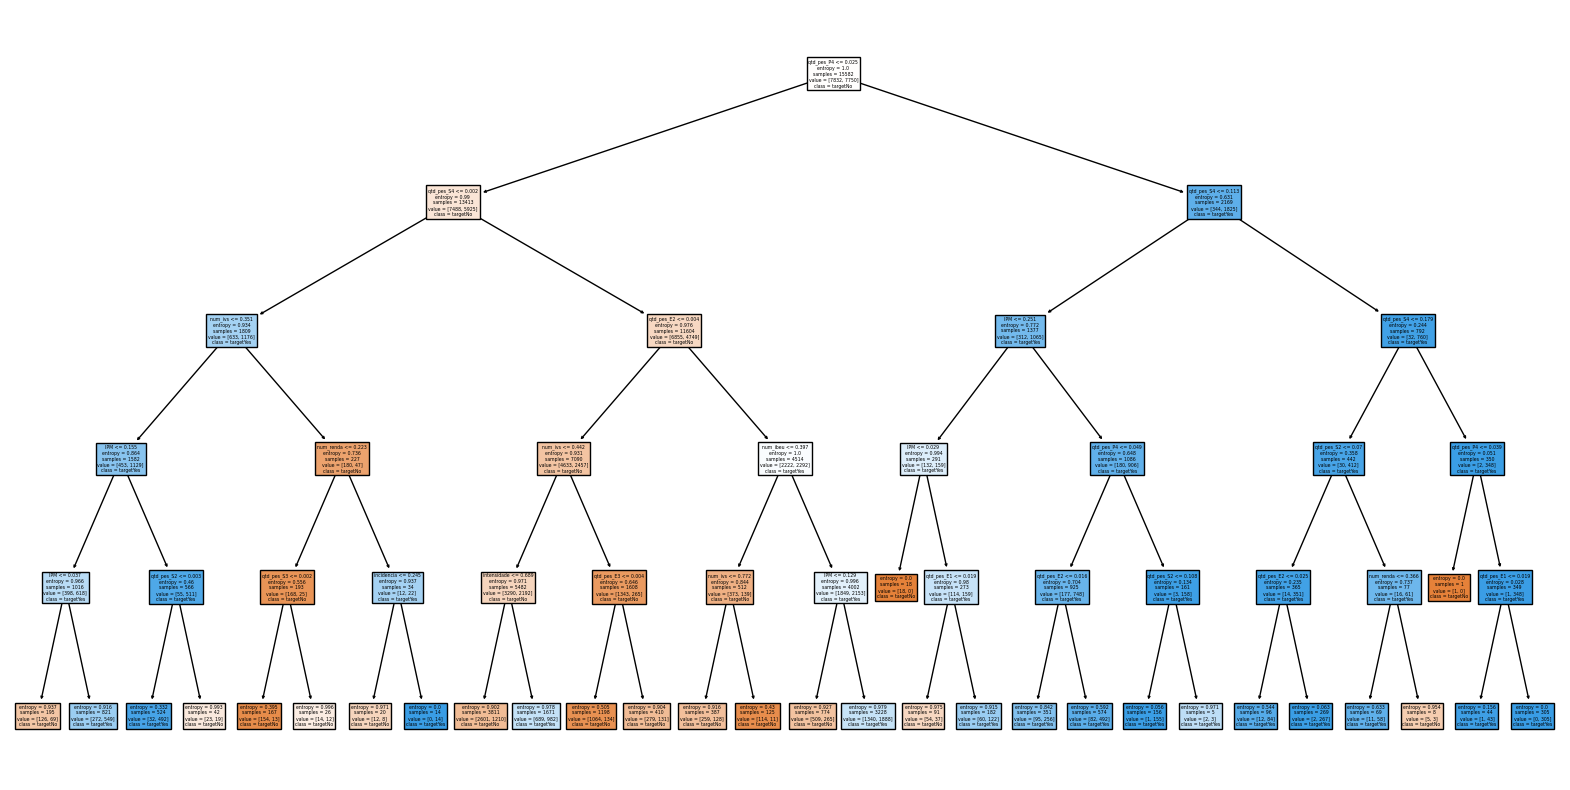

In [212]:
model = DecisionTreeClassifier(criterion="entropy", max_depth=5)
model = model.fit(X_train,y_train)
fig = plt.figure(figsize=(20,10))
_ = tree.plot_tree(model,
                   feature_names=X.columns,
                   class_names=['targetNo','targetYes'],
                   filled=True)

In [213]:
print('- Matriz de Confusão')
print(confusion_matrix(y_test, model.predict(X_test)))
print('\n- Reporte completo')
print(classification_report(y, model.predict(X)))
print('\n- Reporte teste')
print(classification_report(y_test, model.predict(X_test)))

- Matriz de Confusão
[[2142 1156]
 [ 959 2421]]

- Reporte completo
              precision    recall  f1-score   support

         0.0       0.71      0.66      0.69     11130
         1.0       0.68      0.73      0.71     11130

    accuracy                           0.70     22260
   macro avg       0.70      0.70      0.70     22260
weighted avg       0.70      0.70      0.70     22260


- Reporte teste
              precision    recall  f1-score   support

         0.0       0.69      0.65      0.67      3298
         1.0       0.68      0.72      0.70      3380

    accuracy                           0.68      6678
   macro avg       0.68      0.68      0.68      6678
weighted avg       0.68      0.68      0.68      6678



In [214]:
model.predict(X_new)

array([1., 1., 1.])

In [215]:
dfML.loc[[6785,7586,2195]]

,incidencia,qtd_pes_E1,qtd_pes_E2,qtd_pes_E3,qtd_pes_S1,qtd_pes_S2,qtd_pes_S3,qtd_pes_S4,qtd_pes_T1,qtd_pes_T2,...,qtd_pes_P2,qtd_pes_P3,qtd_pes_P4,intensidade,IPM,num_idhm,num_ivs,num_ibeu,num_renda,racaML
6785,0.598478,0.005574,0.009047,0.011864,0.000000,0.016905,0.010180,0.037248,0.012578,0.002891,...,0.004468,0.013200,0.015129,0.738597,0.460271,0.333333,0.667147,0.560158,0.104537,0.0
7586,0.223892,0.086413,0.131075,0.135824,0.053985,0.058966,0.115893,0.140461,0.093029,0.148285,...,0.097988,0.152819,0.140660,0.693010,0.161560,0.621622,0.380403,0.672584,0.232756,1.0
2195,0.679095,0.007895,0.011134,0.013673,0.020280,0.023076,0.013329,0.065434,0.019654,0.003338,...,0.009788,0.019899,0.032404,0.779424,0.551139,0.367117,0.646974,0.627219,0.065707,1.0


In [216]:
X_new

,incidencia,qtd_pes_E1,qtd_pes_E2,qtd_pes_E3,qtd_pes_S1,qtd_pes_S2,qtd_pes_S3,qtd_pes_S4,qtd_pes_T1,qtd_pes_T2,...,qtd_pes_P1,qtd_pes_P2,qtd_pes_P3,qtd_pes_P4,intensidade,IPM,num_idhm,num_ivs,num_ibeu,num_renda
6785,0.598478,0.005574,0.009047,0.011864,0.000000,0.016905,0.010180,0.037248,0.012578,0.002891,...,0.001507,0.004468,0.013200,0.015129,0.738597,0.460271,0.333333,0.667147,0.560158,0.104537
7586,0.223892,0.086413,0.131075,0.135824,0.053985,0.058966,0.115893,0.140461,0.093029,0.148285,...,0.014442,0.097988,0.152819,0.140660,0.693010,0.161560,0.621622,0.380403,0.672584,0.232756
2195,0.679095,0.007895,0.011134,0.013673,0.020280,0.023076,0.013329,0.065434,0.019654,0.003338,...,0.023693,0.009788,0.019899,0.032404,0.779424,0.551139,0.367117,0.646974,0.627219,0.065707


### Regressão Logística

In [217]:
model = LogisticRegression(penalty='none', solver='newton-cg')
model.fit(X_train, y_train)

print('- Matriz de Confusão')
print(confusion_matrix(y_test, model.predict(X_test)))
print('\n- Reporte completo')
print(classification_report(y, model.predict(X)))
print('\n- Reporte teste')
print(classification_report(y_test, model.predict(X_test)))

- Matriz de Confusão
[[2581  717]
 [1015 2365]]

- Reporte completo
              precision    recall  f1-score   support

         0.0       0.73      0.78      0.75     11130
         1.0       0.76      0.70      0.73     11130

    accuracy                           0.74     22260
   macro avg       0.74      0.74      0.74     22260
weighted avg       0.74      0.74      0.74     22260


- Reporte teste
              precision    recall  f1-score   support

         0.0       0.72      0.78      0.75      3298
         1.0       0.77      0.70      0.73      3380

    accuracy                           0.74      6678
   macro avg       0.74      0.74      0.74      6678
weighted avg       0.74      0.74      0.74      6678



In [218]:
model.predict(X_new)

array([0., 1., 1.])

In [219]:
dfML.loc[[6785,7586,2195]]

,incidencia,qtd_pes_E1,qtd_pes_E2,qtd_pes_E3,qtd_pes_S1,qtd_pes_S2,qtd_pes_S3,qtd_pes_S4,qtd_pes_T1,qtd_pes_T2,...,qtd_pes_P2,qtd_pes_P3,qtd_pes_P4,intensidade,IPM,num_idhm,num_ivs,num_ibeu,num_renda,racaML
6785,0.598478,0.005574,0.009047,0.011864,0.000000,0.016905,0.010180,0.037248,0.012578,0.002891,...,0.004468,0.013200,0.015129,0.738597,0.460271,0.333333,0.667147,0.560158,0.104537,0.0
7586,0.223892,0.086413,0.131075,0.135824,0.053985,0.058966,0.115893,0.140461,0.093029,0.148285,...,0.097988,0.152819,0.140660,0.693010,0.161560,0.621622,0.380403,0.672584,0.232756,1.0
2195,0.679095,0.007895,0.011134,0.013673,0.020280,0.023076,0.013329,0.065434,0.019654,0.003338,...,0.009788,0.019899,0.032404,0.779424,0.551139,0.367117,0.646974,0.627219,0.065707,1.0
